In [1]:
#!pip install pytrends
import pytrends.exceptions
from pytrends.request import TrendReq
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def retrieve_data(lista: list, mode: str):
    pytrends = TrendReq()
    if mode == 'overall':
        pytrends.build_payload(kw_list=lista, timeframe='2021-01-01 2023-02-21', geo='IT')
        dataframe = pytrends.interest_over_time().iloc[:,:-1]

    elif mode == 'individual':
        dataframe = pd.DataFrame()
        for i in lista:
            pytrends.build_payload(kw_list=[i], timeframe='2021-01-01 2023-02-21', geo='IT')
            dataframe = pd.concat([dataframe, pytrends.interest_over_time().iloc[:,:-1]], axis = 1)

    dataframe.reset_index(inplace = True)
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe.set_index('date', inplace = True)
    return dataframe

topic = ['putin', 'zelensky']
data_individual = retrieve_data(topic, 'individual')
data_overall = retrieve_data(topic, 'overall')

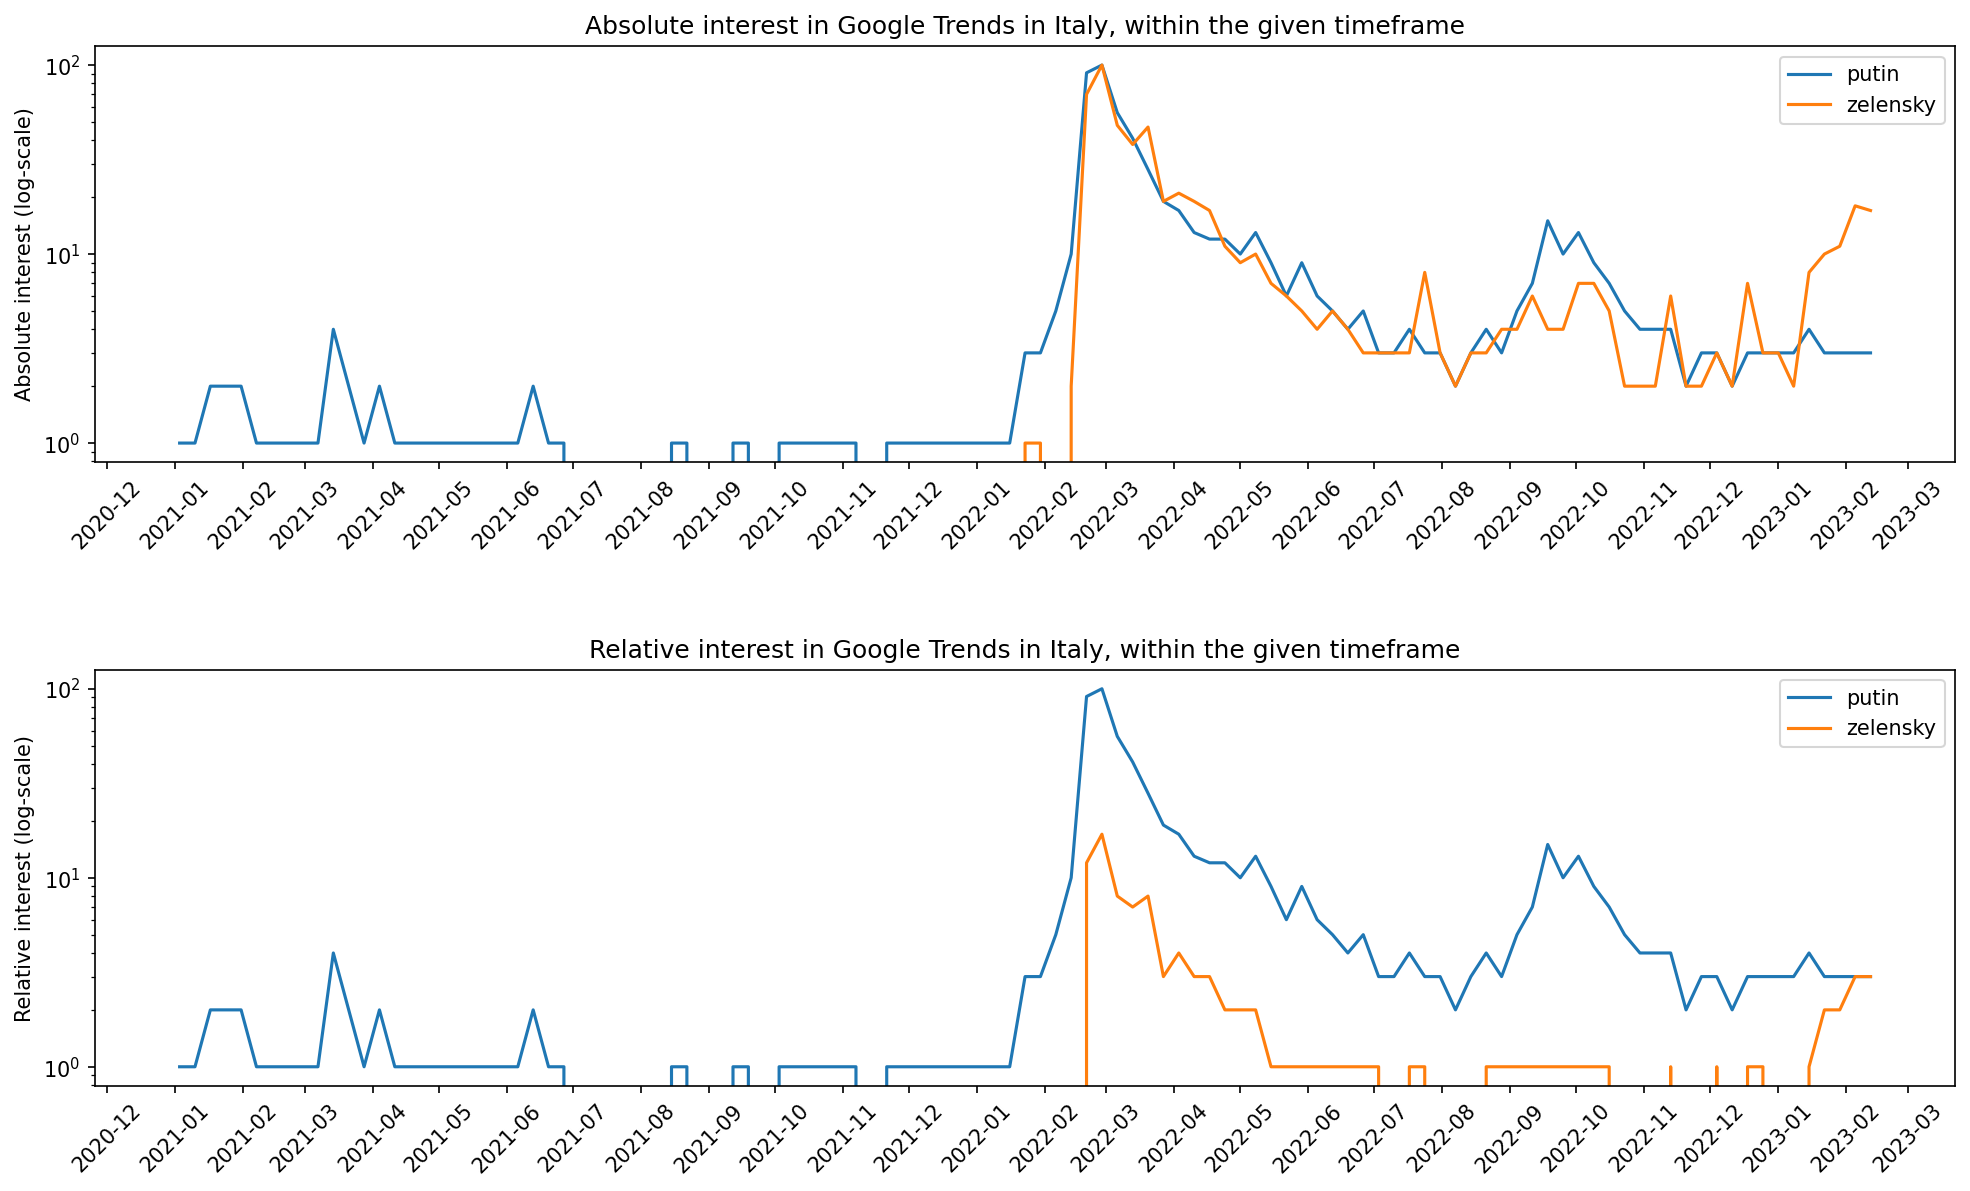

In [6]:
def plotting(dataframes: list, log = False):
    gs = GridSpec(2, 1)
    plt.figure(figsize=(16, 9), dpi = 150)

    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(dataframes[0].index, dataframes[0][topic], label = topic)
    ax1.set_title('Absolute interest in Google Trends in Italy, within the given timeframe')
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45)
    ax1.legend(loc="upper right")
    ax1.set_ylabel('Absolute interest (log-scale)')
    if log == True:
        plt.yscale('log')

    ax2 = plt.subplot(gs[1, 0], sharex = ax1)
    ax2.plot(dataframes[1].index, dataframes[1][topic], label = topic)
    ax2.set_title('Relative interest in Google Trends in Italy, within the given timeframe')
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45)
    ax2.legend(loc="upper right")
    ax2.set_ylabel('Relative interest (log-scale)')
    if log == True:
        plt.yscale('log')

    plt.subplots_adjust(hspace=0.5)

plotting([data_individual, data_overall], log  = True)

# Insights
The plot shows the *interests over time* extracted by Google Trends. The metric is calculated by scaling between 0 and 100 the number of researches about a given topic, in a given timeframe, from a given country.
For example, in the upper plot it can be observed that the highest number of researches about "Zelensky" from Italy between the early 2021 and mid-february 2023 occurred between in the late february 2022, when Russia started invading Ukraine. The same goes for *Putin*.
On the other hand, the lower plot shows the relative interest over time with respect to the other topics.
* Before the war, "Putin" was much more searched than "Zelensky". The argument *log = True* of the *plotting* function let appreciate much better the difference in researches.
* During the peak of february 2022, the interest for *Zelensky* was 20, while *Putin* was 100. That means that *Putin* was searched 5 times more than *Zelensky*.
* During the war, the *popularity* of *Putin* was much higher than *Zelensky*'s until...
* February 2023, when they matched due to a steep rise in researches about "Zelensky".